# Visualisation LangGraph

Ce notebook permet de visualiser les graphiques LangGraph directement dans Jupyter.

In [8]:
# Import des librairies nécessaires
import sys
import os

# Ajouter le dossier src au path pour importer nos modules
sys.path.append('./src')

from IPython.display import Image, display
from langgraph.prebuilt import create_react_agent
from langchain_ollama import ChatOllama
from langchain.tools import tool
import requests

In [7]:
# Configuration du modèle et des tools
llm = ChatOllama(model="mistral:latest", temperature=0)

@tool
def get_weather(city: str) -> dict:
    """Retourne la météo actuelle pour une ville."""
    # Coordonnées exemple pour Paris
    lat, lon = 48.8566, 2.3522
    
    r = requests.get(
        "https://api.open-meteo.com/v1/forecast",
        params={
            "latitude": lat,
            "longitude": lon,
            "current": "temperature_2m,wind_speed_10m",
        },
        timeout=6, 
    )
    r.raise_for_status()
    cur = r.json().get("current", {})
    return {"city": city, "latitude": lat, "longitude": lon, **cur}

# Création de l'agent
agent = create_react_agent(
    model=llm,
    tools=[get_weather],
    prompt="You are a helpful weather assistant."
)

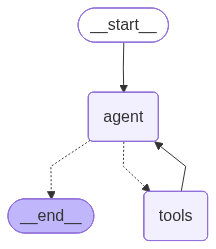

In [6]:
# Visualisation du graphique
try:
    # Générer l'image PNG du graphique
    img = agent.get_graph().draw_mermaid_png()
    
    # Afficher l'image dans le notebook
    display(Image(img))
    
except Exception as e:
    print(f"Erreur lors de la génération de l'image: {e}")
    # Afficher le code Mermaid en texte comme alternative
    print("\nCode Mermaid du graphique:")
    print(agent.get_graph().draw_mermaid())

In [ ]:
# Test de l'agent
response = agent.invoke({
    "messages": [{"role": "user", "content": "What's the weather like in Paris?"}]
})

print("Réponse de l'agent:")
print(response["messages"][-1].content)